# **What makes people in a country happy?**
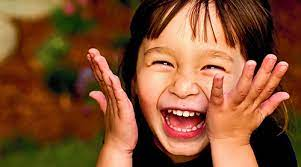





Notebook này khám phá và phân tích dữ liệu cho World Happiness Report từ bộ dữ liệu các năm 2015-2019. Bao gồm các nhân tố chính được ra phân tích như: Region,GDP, Healthy, Freedom, Generosity, Social Support, Corruptions_perceptions.Các yếu tố này chứng minh sự tương quan với Happiness_rank và Happiness_score của các vùng(quốc gia)hay không?

Qua các nội dung chính sau:



**Nội dung:**
1. Các thư viện sử dụng
2. Đọc dữ liệu của các năm (2015_2019)
3. Chọn những yếu tố(trường) để phân tích
4. Biểu đồ heatmap tương qua giữa các yếu tố
5. Vì sao 10 quốc gia hạnh phúc nhât
6. Các biểu đồ giữa Happiness_rank với GDP, social_support, freedom, healthy, generosity, corruption_perceptions
7. Biểu đồ tròn thể hiện sự đóng góp của từng yếu tố(trường)
8. Kết luận

# **1. Các thư viện được sử dụng**

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
import matplotlib.pyplot as plt

# **2. Đọc dữ liệu từ các năm 2015_2019**

In [ ]:
# d2015 = pd.read_csv("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/2015.csv")
# d2016 = pd.read_csv("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/2016.csv")
# d2017 = pd.read_csv("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/2017.csv")
# d2018 = pd.read_csv("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/2018.csv")
# d2019 = pd.read_csv("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/2019.csv")

x = 2015
dfs = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'/content/drive/MyDrive/kaggle_bt/Data_analysis_process/happiness/{x}.csv')
    dfs.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

In [ ]:
for i, df in enumerate(dfs):
    print (f'201{i+5} dataset:')
    display (dfs[i].head(3))

In [ ]:
for i, df in enumerate(dfs):
    print (f'Size of 201{i+5} Report:', dfs[i].shape)

Size of 2015 Report: (158, 12)
Size of 2016 Report: (157, 13)
Size of 2017 Report: (155, 12)
Size of 2018 Report: (156, 9)
Size of 2019 Report: (156, 9)


# **3. Chọn các trường để phân tích theo mỗi năm**

# **3.1 Data 2019**

In [ ]:
coltoselect = ["Happiness rank","region","score",
                "GDP","healthy",
                "freedom","generosity","corruption_perceptions"]
d2019.columns = ["Happiness_rank","region","score",
                  "GDP","social_support","healthy",
                 "freedom","generosity","corruption_perceptions"]

d2019.head()

,Happiness_rank,region,score,GDP,social_support,healthy,freedom,generosity,corruption_perceptions
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


# **3.2 Data 2018**

In [ ]:
d2018.columns = ["Happiness_rank","region","score",
                  "GDP","social_support","healthy",
                 "freedom","generosity","corruption_perceptions"]
d2018.head()

,Happiness_rank,region,score,GDP,social_support,healthy,freedom,generosity,corruption_perceptions
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


# **3.3 Data 2017**

In [ ]:
d2017.drop(["Whisker.high","Whisker.low",
            "Family","Dystopia.Residual"], axis=1, inplace=True)
d2017.columns =  ["region","Happiness_rank","score",
                  "GDP","healthy", "freedom","generosity","corruption_perceptions"]
d2017.head()

,region,Happiness_rank,score,GDP,healthy,freedom,generosity,corruption_perceptions
0,Norway,1,7.537,1.616463,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,0.809158,0.617951,0.245483,0.382612


# **3.4 Data 2016**

In [ ]:
d2016.drop(['Region','Lower Confidence Interval','Upper Confidence Interval',
            "Family",'Dystopia Residual'],axis=1,inplace=True)
d2016.columns = ["region","Happiness_rank","score",
                  "GDP","healthy", "freedom","corruption_perceptions","generosity"]
d2016.head()

,region,Happiness_rank,score,GDP,healthy,freedom,corruption_perceptions,generosity
0,Denmark,1,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,2,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,3,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,4,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,5,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


# **3.5 Data 2015**

In [ ]:
d2015.drop(["Region",'Standard Error', 'Family', 'Dystopia Residual'],axis=1,inplace=True)
d2015.columns = ["region", "Happiness_rank", "score", "GDP",
"healthy", "freedom", "corruption_perceptions",
"generosity"]
d2015.head()

,region,Happiness_rank,score,GDP,healthy,freedom,corruption_perceptions,generosity
0,Switzerland,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


# **3.6 Thêm trường 'Year' vào Data**

In [ ]:
d2015["year"] = 2015
d2016["year"] = 2016
d2017["year"] = 2017
d2018["year"] = 2018
d2019["year"] = 2019

In [ ]:
final_df = d2015.append([d2016,d2017,d2018,d2019])
final_df.shape
# final_df.head()
final_df[final_df['year'] == 2019].head()

,region,Happiness_rank,score,GDP,healthy,freedom,corruption_perceptions,generosity,year,social_support
0,Finland,1,7.769,1.340,0.986,0.596,0.393,0.153,2019,1.587
1,Denmark,2,7.600,1.383,0.996,0.592,0.410,0.252,2019,1.573
2,Norway,3,7.554,1.488,1.028,0.603,0.341,0.271,2019,1.582
3,Iceland,4,7.494,1.380,1.026,0.591,0.118,0.354,2019,1.624
4,Netherlands,5,7.488,1.396,0.999,0.557,0.298,0.322,2019,1.522


In [ ]:
# Sao chép dữ liệu
chart_final_df = final_df

# **4.The 10 Happiest Countries in the World**

In [ ]:

happiest_countries = chart_final_df.groupby(['region'], sort = False)['score', 'year', 'GDP'].max()
top10 = happiest_countries.sort_values('score', ascending = False)[:10]
fig = px.scatter(top10,
                x = top10.index,
                y = 'score',
                size = 'GDP',
                color = top10.index,
                template = 'xgridoff',
                animation_frame = 'year',
                title = 'The Top 10 Happiest Countries in The World <br> (Bubble Size Indicates GDP)')
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# **5. Biểu đồ heatmap**
Biểu đồ heatmap này cho thấy một cách tổng quát sự tương quan giữa các yếu tố tạo nên hạnh phúc. Chú ý vào biểu đồ đã vẽ ở bên dưới, đặc biệt những ô có màu đậm đỏ, cam đậm _ đó là GDP, social_support, freedom, Healthy là các yếu tố chính góp phần tạo nên Happiness_score lớn. Còn những ô màu nhạt hơn sẽ góp phần ít và ko đóng góp gì cho Happiness_score.

Dưới đây là những phân tích cụ thể từng yếu tố:


In [ ]:
import plotly.figure_factory as ff
z = pd.DataFrame(chart_final_df.corr().values.tolist())
z = z.round(2).values.tolist()
fig = ff.create_annotated_heatmap(z, x = chart_final_df.corr().columns.tolist(), y = chart_final_df.corr().columns.tolist(), colorscale = 'Portland')
fig.update_layout(title = {'text': 'Correlation Heatmap', 'y' : 0.9, 'x' : 0.9}, title_font_size = 25)
fig.show()

# **5.2 GDP VS Happiness Score**

In [ ]:

fig = px.scatter(chart_final_df,
                x = 'GDP',
                y = 'score',
                size = 'healthy',
                color = 'region',
                template = 'xgridoff',
                animation_frame = 'year',
                title = 'GDP vs Happiness Score from years <br> (Bubble Size Indicates Trust)')
fig.show()


In [ ]:
chart_final_df.sort_values('Happiness_rank', ascending = True).head(100)


In [ ]:
fig = px.scatter(chart_final_df, x="GDP", 
                 y="score",
                #  facet_row="year",
                # color="year",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=400,
    title_text='GDP and Happiness Score'
)
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# **5.2 Socila_support vs Happiness_Score**

In [ ]:
chart_social_support = chart_final_df[chart_final_df['year'] >= 2018]
chart_social_support
fig = px.scatter(chart_social_support, x="social_support", 
                 y="score",
                #  facet_row="year",
                # color="year",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=400,
    title_text='Social_Support and Happiness Score'
)
fig.show()

# **5.3 Freedom vs Happiness_Score**

In [ ]:

fig = px.scatter(chart_final_df.iloc[:100,:], x="freedom", 
                 y="score",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=400,
    title_text='Freedom and Happiness Score'
)
fig.show()

# **5.4 Healthy vs Happiness_Score**

In [ ]:
fig = px.scatter(chart_final_df.iloc[:100,:], x="healthy", 
                 y="score",
                #  facet_row="year",
                # color="year",
                trendline= "ols")
fig.update(layout_coloraxis_showscale=False)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=400,
    title_text='Healthy and Happiness Score'
)
fig.show()

# **5.5 Generosity, Corruption_perceptions vs Happiness_Score**

In [ ]:
 df = chart_final_df.iloc[:100, :]
trace1 = go.Scatter(
                    x = df.Happiness_rank,                         # dataframe de sutun isimleri birebir
                    y = df.generosity,
                    mode = "lines",
                    name = "generosity",
                    text= df.region)
# Creating trace2
trace2 = go.Scatter(
                    x = df.Happiness_rank,
                    y = df.score,
                    mode = "lines+markers",
                    name = "score",
                    text= df.region)        
trace3 = go.Scatter(
                    x = df.Happiness_rank,
                    y = df.corruption_perceptions,
                    name = "corruption_perception"
)                                 

data = [trace1, trace2,trace3]
layout = dict(title = 'Corruption_perception, Generosity and Happiness Score ',
              xaxis= dict(title= 'Happiness_Rank',ticklen= 5,zeroline= False)      #zeroline sifirdan baslamak gosterilsin mi?
             )
fig = dict(data = data, layout = layout)
iplot(fig)

# **6. Biểu đồ thể hiện phần trăm đóng góp của từng yếu tố**

In [ ]:

final_df = chart_final_df[chart_final_df['year'] >= 2018]
sum = 0
sum_df = []
chart_sum_df = []
col_sum_df = ['GDP', 'healthy', 'freedom', 'corruption_perceptions', 'generosity', 'social_support']
for i in col_sum_df:
  sum_df.append(final_df[i].sum())
sum_df
for i in sum_df:
  sum += i
for i in sum_df:
  chart_sum_df.append(round((i * 100) / sum,2) )
print(chart_sum_df)


[25.75, 18.96, 12.14, 3.18, 5.24, 34.72]


Text(0.5, 1.0, 'Factors contribute to Happiness')

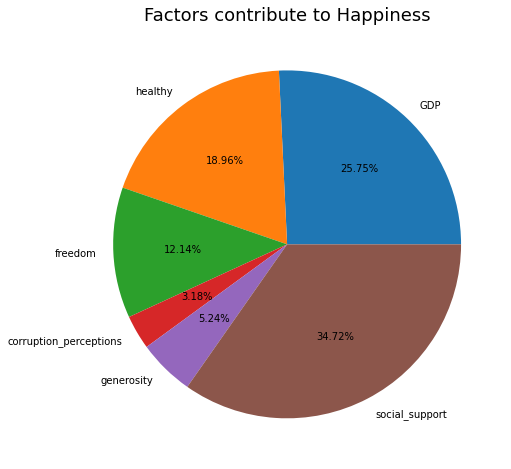

In [ ]:

plt.figure(figsize=(16, 8))
plt.pie(chart_sum_df,
        labels = col_sum_df, # Nhãn của các nhóm
        autopct = '%1.2f%%', # Format hiển thị giá trị %
        shadow = False)
plt.title("Factors contribute to Happiness", fontsize=18)

# **7. Kết luận**
**What makes you happy?**



*   Social_support có tác động cao nhất đến Happiness
*   GDP bình quân đầu người có tác động cao thứ 2 đến Happiness
*   Healthy đứng thứ ba trong danh sách ảnh hưởng đến Happiness
*   Freedom đến sau Healthy ảnh hưởng đến Happiness
*   Generoity và Corruption_perceptions ít ảnh hưởng đến Hạnh phúc


## So, **Social_support, GDP, Healthy, Freedom Make the people happy**



